<a href="https://colab.research.google.com/github/2022Group3/projectNotebooks/blob/main/analize_model_not_confident_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import load_model
import numpy as np
import sys
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
model=load_model(r'drive/MyDrive/new_model.h5')
# csv_data= pd.read_csv(r'drive/MyDrive/data.csv')

In [5]:
def load_dataset():
  data=np.load(r'drive/MyDrive/data_modified_new_labels.npz')
  data=dict(zip(("{}".format(k) for k in data),(data[k] for k in data)))
  trainX=data['train']
  trainy=data['ytrain']
  validationX=data['validation']
  validationy=data['yvalidation']
  testX=data['test']
  testy=data['ytest']
  return trainX,to_categorical(trainy),validationX,to_categorical(validationy),testX,to_categorical(testy)

In [6]:
def load_dataset2():
  data=np.load(r'drive/MyDrive/out_and_in_disrib_img.npz')
  data=dict(zip(("{}".format(k) for k in data),(data[k] for k in data)))
  testXout=data['nltestx']
  testYout=data['nltesty']
  testXin=data['yltestx']
  testYin=data['yltesty']
  return testXout,to_categorical(testYout),testXin,to_categorical(testYin)

In [7]:
# scale pixels
def prep_pixels(testX):
  # convert from integers to floats
  testX_norm = testX.astype('float32')
  # normalize to range 0-1
  testX_norm = testX_norm / 255.0
  
  # return normalized images
  return testX_norm

In [8]:
trainX,trainy,validationX,validationy,testX,testy=load_dataset()

In [9]:
testXout,testYout,testXin,testYin=load_dataset2()

In [10]:
testy.shape

(22500, 15)

In [11]:
testXout=prep_pixels(testXout)
testX= prep_pixels(testX)
testy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
testXA=testX[0:2000]
testXA.shape

(2000, 32, 32, 3)

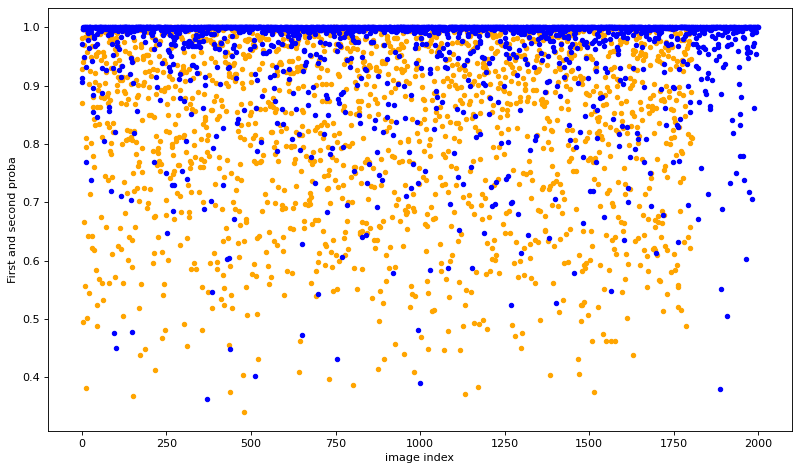

In [21]:
pred_in=model.predict(testXA)
pred_out = model.predict(testXout)
pred_in_prob_list=[sorted(pred_in[i])[-1]+sorted(pred_in[i])[-2] for i in range(len(pred_in))]
pred_out_prob_list=[sorted(pred_out[i])[-1]+sorted(pred_out[i])[-2] for i in range(len(pred_out))]

plt.figure(figsize=(12, 7), dpi=80)

plt.scatter(np.arange(0,len(pred_out_prob_list)), pred_out_prob_list,s=15, c ="orange")
plt.scatter(np.arange(0,len(pred_in_prob_list)), pred_in_prob_list,s=15, c ="blue")


plt.xlabel('image index')
plt.ylabel('First and second proba')
plt.show()

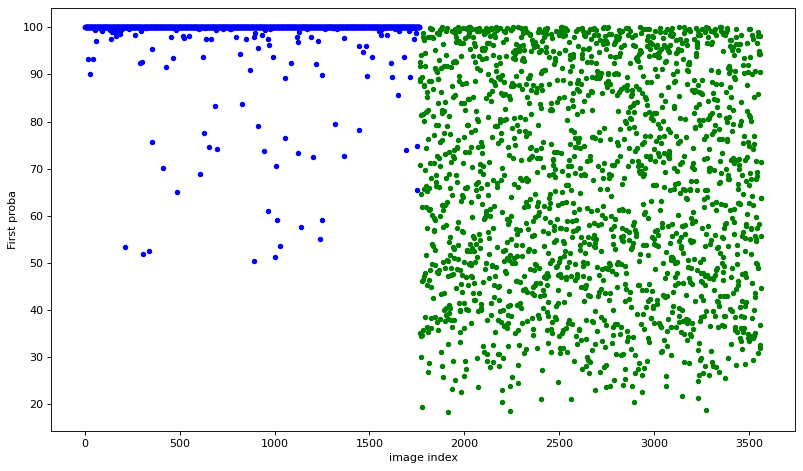

In [27]:
pred_in=model.predict(testXin)
pred_out = model.predict(testXout)
pred_in_prob_list=[np.max(pred_in[i])*100 for i in range(len(pred_in))]
pred_out_prob_list=[np.max(pred_out[i])*100 for i in range(len(pred_out))]

plt.figure(figsize=(12, 7), dpi=80)

plt.scatter(np.arange(0,len(pred_in_prob_list)), pred_in_prob_list,s=15, c ="blue")
plt.scatter(np.arange(len(pred_in_prob_list),len(pred_in_prob_list)+len(pred_out_prob_list)), pred_out_prob_list,s=15, c ="green")

plt.xlabel('image index')
plt.ylabel('First proba')
plt.show()

In [ ]:
# 1
# Dif between 2 first. Green if first predict is true, Else red.
def img_pred_and_sum_of_d(pred1, pred2, real):
  if pred1[0] == real:
    good_pred = True
  else:
    good_pred = False
  dif= pred1[1]- pred2[1]
  return good_pred, dif


def plot_graph(testy, pred):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= [np.argmax(pred[i]), np.max(pred[i])*100]
    pred[i, np.argmax(pred[i])]=0.0
    pred2= [np.argmax(pred[i]), np.max(pred[i])*100]
    good_pred,dif = img_pred_and_sum_of_d(pred1, pred2, np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('dif between first and second place pred')
  plt.show()

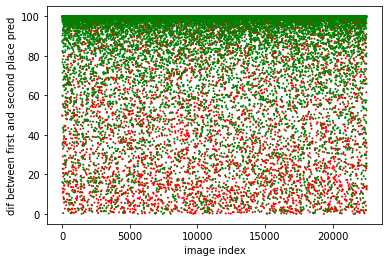

In [ ]:
plot_graph(testy, model.predict(testX))

In [ ]:
# 2
# Dif between 2 first. Green if true in first predict or second. Else red 
def img_pred_and_sum_of_d2(pred1, pred2, real):
  if pred1[0] == real or pred2[0] == real:
    good_pred = True
  else:
    good_pred = False
  dif= pred1[1]- pred2[1]
  return good_pred, dif

def plot_graph2(testy, pred):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= [np.argmax(pred[i]), np.max(pred[i])*100]
    pred[i, np.argmax(pred[i])]=0.0
    pred2= [np.argmax(pred[i]), np.max(pred[i])*100]
    good_pred,dif = img_pred_and_sum_of_d2(pred1, pred2, np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('dif between first and second place pred')
  plt.show()

 

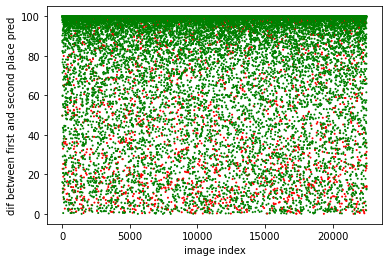

In [ ]:
plot_graph2(testy, model.predict(testX))

In [ ]:
# 3
# Sum of dif between sorted predicts array. Green if first predict is true

def img_pred_and_sum_of_d_all(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(len(sorted_preds)-1):
    sumdif+= sorted_preds[i]-sorted_preds[i+1]
  
  return good_pred, sumdif

def plot_graph_all(testy, preds):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_and_sum_of_d_all(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('dif between first and second place pred')
  plt.show()



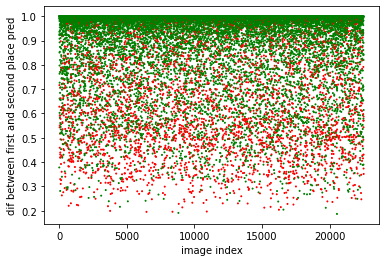

In [ ]:
plot_graph_all(testy, model.predict(testX))




In [ ]:
# 4
# Sum of probs dif and sum of 2 highest proba
def img_pred_and_sum_of_d_all2(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(len(sorted_preds)-1):
    sumdif+= sorted_preds[i]-sorted_preds[i+1]
  sum_two_first= sorted_preds[0]+sorted_preds[1]
  
  return good_pred, sumdif, sum_two_first

def plot_graph_all_sum(testy, preds):
  good_pred_list= []
  dif_list= []
  sum_two_first_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif, sum_two_first = img_pred_and_sum_of_d_all2(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
    sum_two_first_list.append(sum_two_first)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(sum_two_first_list, dif_list, c=mycolors, s=1)
  plt.xlabel('Sum of first and second prob')
  plt.ylabel('Sum all probabilty diff')
  plt.show()

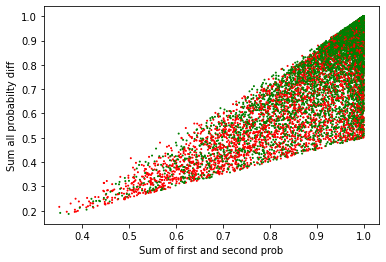

In [ ]:
plot_graph_all_sum(testy, model.predict(testX))


In [ ]:
# 5
# sum of proba with weights by first place, swcond place and so on...
def img_sum_pred_weight(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False

  sorted_preds= np.sort(preds)[::-1]
  sum_weight=0
  num_proba= len(preds)
  for i in range(len(sorted_preds)-1):
    if num_proba-i < (num_proba/3):
      w=0.5
    elif num_proba-i < (num_proba/3)*2:
      w=1.0
    else:
        w=2.0
    sum_weight+= (sorted_preds[i])*(num_proba-i)*(num_proba-i)*w
  
  return good_pred, sum_weight

def plot_graph_all_sum3(testy, preds):
  good_pred_list= []
  sum_weight_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,sum_weight = img_sum_pred_weight(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    sum_weight_list.append(sum_weight)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)),sum_weight_list , c=mycolors, s=1)
  plt.xlabel('Image index')
  plt.ylabel('Sum all probabilty with weights')
  plt.show()

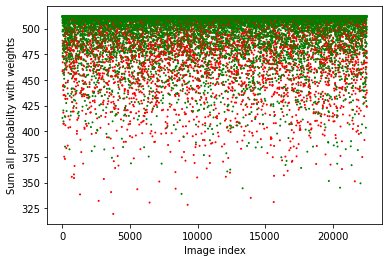

In [ ]:
plot_graph_all_sum3(testy, model.predict(testX))


הגרף הבא הוספתי מאוחר יותר:
מחשב את סכום המרחק של כל ההסתברות מההסתברות הראשונה

In [ ]:
# 6
# Sum of dif from first between sorted predicts array. Green if first predict is true

def img_pred_and_sum_of_d_all_first(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(1, len(sorted_preds)):
    sumdif+= sorted_preds[0]-sorted_preds[i]
  
  return good_pred, sumdif

def plot_graph_all_first(testy, preds):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_and_sum_of_d_all_first(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('dif between first and second place pred')
  plt.show()


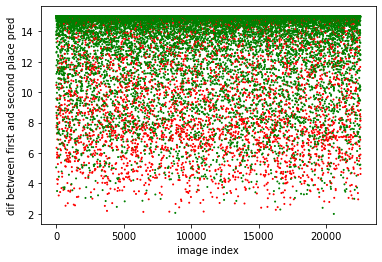

In [ ]:
plot_graph_all_first(testy, model.predict(testX))


גרף מעניין נוסף: סכום ההפרש הראשון פחות שאר ההפרשים

In [ ]:

def img_pred_and_sum_of_d_first_not_all(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(1, len(sorted_preds)-1):
    sumdif+= sorted_preds[i]-sorted_preds[i+1]
  first_diff=sorted_preds[0]-sorted_preds[1]
  
  return good_pred, first_diff-sumdif

def plot_graph_first_not_all(testy, preds):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_and_sum_of_d_first_not_all(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('dif between first and second place pred')
  plt.show()


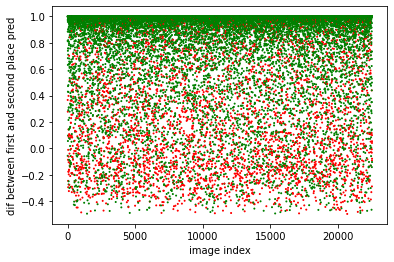

In [ ]:
plot_graph_first_not_all(testy, model.predict(testX))


השאר סתם כל מיני משחקים, די חוזר על עצמו

In [ ]:

def img_pred_and_sum_of_d_first_not_all1(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(1, len(sorted_preds)-1):
    sumdif+= sorted_preds[i]-sorted_preds[i+1]
  first_diff=sorted_preds[0]-sorted_preds[1]
  
  return good_pred, first_diff-sumdif

def plot_graph_first_not_all1(testy, preds):
  good_pred_list= []
  dif_list= []
  first_sum=[]
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_and_sum_of_d_first_not_all1(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
    first_sum.append(np.max(preds[i]))
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(first_sum, dif_list, c=mycolors, s=1)
  plt.xlabel('first proba')
  plt.ylabel('dif between first and second place pred')
  plt.show()

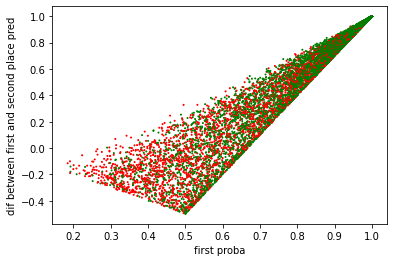

In [ ]:
plot_graph_first_not_all1(testy, model.predict(testX))


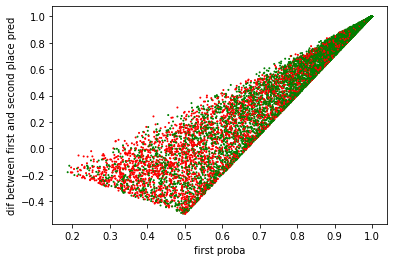

In [ ]:
plot_graph_first_not_all1(testy, model.predict(testX))


In [ ]:
def img_pred_and_sum_of_d_first_not_all2(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  # print(sorted_preds)
  sumdif=0
  for i in range(1, len(sorted_preds)-1):
    sumdif+= sorted_preds[i]-sorted_preds[i+1]
  first_diff=sorted_preds[0]-sorted_preds[1]
  
  return good_pred, first_diff-sumdif

def plot_graph_first_not_all2(testy, preds):
  good_pred_list= []
  dif_list= []
  first_second_sum=[]
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_and_sum_of_d_first_not_all2(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
    first_second_sum.append(np.max(preds[i])+ sorted(preds[i])[-2])
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(first_second_sum, dif_list, c=mycolors, s=1)
  plt.xlabel('sum of first and second proba')
  plt.ylabel('dif between first all')
  plt.show()

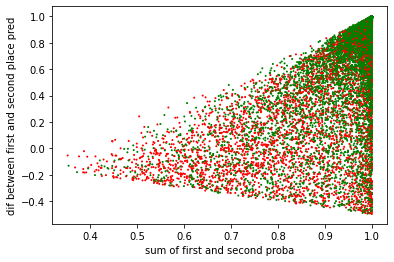

In [ ]:
plot_graph_first_not_all2(testy, model.predict(testX))


סכום גובה 2 ההסתברויות הראשונות

In [ ]:
def img_pred(pred1, pred2,pred_label, real):

  if pred_label == real:
    good_pred = True
  else:
    good_pred = False
  
  return good_pred, pred1+pred2

def plot_(testy, preds):
  good_pred_list= []
  sum_list= []
  for i in range(len(testy)):
    pred1= sorted(preds[i])[-1]
    pred2= sorted(preds[i])[-2]
    good_pred,sum = img_pred(pred1, pred2, np.argmax(preds[i]), np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    sum_list.append(sum)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), sum_list, c=mycolors, s=1)
  plt.xlabel('Image')
  plt.ylabel('Sum first 2')
  plt.show()

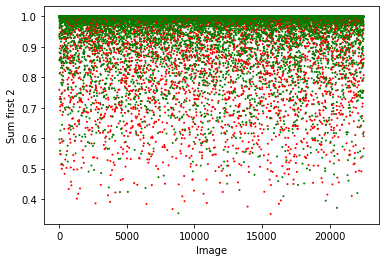

In [ ]:
plot_(testy, model.predict(testX))


חישוב של גובה ההסתברות הראשונה פחות סכום שאר ההסתברויות

In [ ]:
def img_pred_first_not_all(pred1, preds, real):

  if pred1 == real:
    good_pred = True
  else:
    good_pred = False
  sorted_preds= np.sort(preds)[::-1]
  my_sum= sorted_preds[0]- sum(sorted_preds[1:])
  first_diff=sorted_preds[0]-sorted_preds[1]
  return good_pred, my_sum

def plot_graph_first_not_all22(testy, preds):
  good_pred_list= []
  dif_list= []
  for i in range(len(testy)):
    pred1= np.argmax(preds[i])
    good_pred,dif = img_pred_first_not_all(pred1, preds[i], np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), dif_list, c=mycolors, s=1)
  plt.xlabel('image index')
  plt.ylabel('first proba substract other proba')
  plt.show()

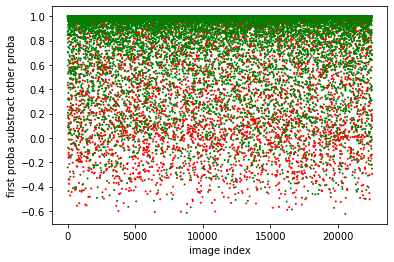

In [ ]:
plot_graph_first_not_all22(testy, model.predict(testX))

In [ ]:
def img_pred_and_sum_of_d1(pred1, pred2, real):
  if pred1[0] == real:
    good_pred = True
  else:
    good_pred = False
  dif= pred1[1]- pred2[1]
  return good_pred, dif


def plot_graph1(testy, pred):
  good_pred_list= []
  dif_list= []
  max_list=[]
  for i in range(len(testy)):
    pred1= [np.argmax(pred[i]), np.max(pred[i])*100]
    pred[i, np.argmax(pred[i])]=0.0
    pred2= [np.argmax(pred[i]), np.max(pred[i])*100]
    good_pred,dif = img_pred_and_sum_of_d1(pred1, pred2, np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
    max_list.append(pred1[1])
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(max_list, dif_list, c=mycolors, s=1)
  plt.xlabel('Max proba')
  plt.ylabel('dif between first and second place pred')
  plt.show()

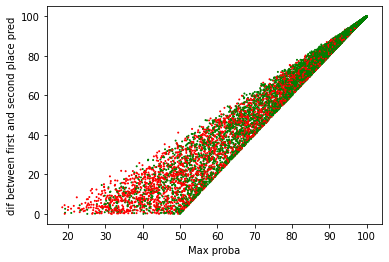

In [ ]:
plot_graph1(testy, model.predict(testX))

In [ ]:
def img_pred_and_sum_of_d2(pred1, pred2, real):
  if pred1[0] == real:
    good_pred = True
  else:
    good_pred = False
  dif= pred1[1]- pred2[1]
  return good_pred, dif


def plot_graph2(testy, pred):
  good_pred_list= []
  dif_list= []
  max_list=[]
  for i in range(len(testy)):
    pred1= [np.argmax(pred[i]), np.max(pred[i])*100]
    pred[i, np.argmax(pred[i])]=0.0
    pred2= [np.argmax(pred[i]), np.max(pred[i])*100]
    good_pred,dif = img_pred_and_sum_of_d2(pred1, pred2, np.argmax(testy[i]))
    good_pred_list.append(good_pred)
    dif_list.append(dif)
    max_list.append(pred1[1]+pred2[1])
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(max_list, dif_list, c=mycolors, s=1)
  plt.xlabel('Max two proba')
  plt.ylabel('dif between first and second place pred')
  plt.show()

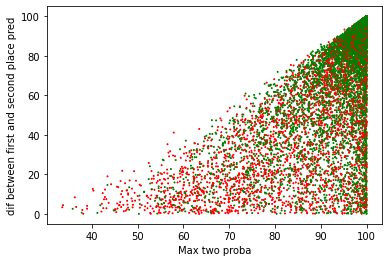

In [ ]:
plot_graph2(testy, model.predict(testX))

In [ ]:

def plot_graph3(testy, pred):
  good_pred_list= []
  max_list=[]
  for i in range(len(testy)):
    pred1= [np.argmax(pred[i]), np.max(pred[i])*100]
    pred[i, np.argmax(pred[i])]=0.0
    pred2= [np.argmax(pred[i]), np.max(pred[i])*100]
    max_list.append(pred1[1]+pred2[1])
    if np.argmax(testy[i])== pred1[0]:
      good_pred_list.append(True)
    else:
      good_pred_list.append(False)
  mycolors= [('g' if i else 'r') for i in good_pred_list]
  plt.scatter(np.arange(0,len(testy)), max_list, c=mycolors, s=1)
  plt.xlabel('Image')
  plt.ylabel('Sum of two first proba')
  plt.show()

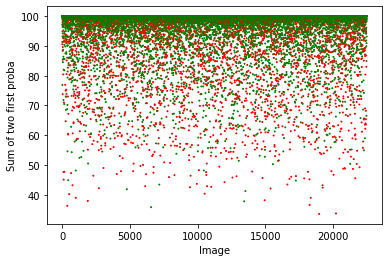

In [ ]:
plot_graph3(testy, model.predict(testX))

In [ ]:

def plot_graph1(testy, pred, pred_out):
  good_pred_list= [('g' if np.argmax(pred[i]) == np.argmax(testy[i]) else 'r' ) for i in range(len(testy))]
  dif_list_in= [((sorted(pred[i])[-1])*100 - (sorted(pred[i])[-2])*100 ) for i in range(len(testy))]
  max_list_in=[np.max(x)*100 for x in pred]

  pred_out_max_prob_list=[np.max(x)*100 for x in pred_out]
  pred_out_dif_list = [(sorted(pred_out[i])[-1])*100 - (sorted(pred_out[i])[-2])*100 for i in range(len(pred_out))]
  # plt.scatter(max_list_in, dif_list_in, c=good_pred_list, s=1)
  plt.scatter(pred_out_max_prob_list,pred_out_dif_list, c='b', s=1)
  plt.xlabel('Max proba')
  plt.ylabel('dif between first and second place pred')
  plt.show()

In [ ]:
pr=model.predict(testX)
pr_out=model.predict(testXout) 

[0.94673157, 0.62049353, 0.71936136, 0.9905137, 0.98865986, 0.96467197, 0.99944395, 0.9929268, 0.73071057, 0.99985063, 0.99910825, 0.6464663, 0.6759387, 0.9999833, 0.9999912, 0.99999976, 0.92737955, 0.9249505, 0.9615384, 0.95892435, 0.9980901, 0.7780682, 0.99994266, 0.99901843, 0.9996302, 0.999788, 0.97478014, 0.9959663, 0.51423347, 0.9995459, 0.9977558, 0.8971925, 0.8317609, 0.72262275, 0.43787065, 0.8460166, 0.9605974, 0.9999399, 0.9999491, 0.9995857, 0.62680924, 0.9852579, 0.9850819, 0.9998764, 0.75609523, 0.9025517, 0.6754773, 0.9575324, 0.9978689, 0.99534285, 0.98822707, 0.9728334, 0.9997801, 0.99996734, 0.9999902, 0.99443746, 0.9823851, 0.9999882, 0.99815065, 0.8436978, 0.7840181, 0.99996924, 0.9999591, 0.8220904, 0.9983827, 0.99452305, 0.9961861, 0.7269482, 0.9999511, 0.9964551, 0.9988865, 0.9999981, 0.74700576, 0.7205832, 0.8330986, 0.99859315, 0.999985, 0.999905, 0.81029195, 0.77125263, 0.759816, 0.9938164, 0.98043376, 0.9969585, 0.99999833, 0.45619002, 0.96466774, 0.98823917,

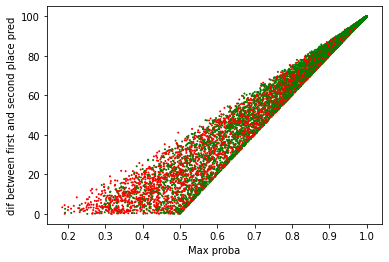

In [ ]:
plot_graph1(testy, pr,pr_out )

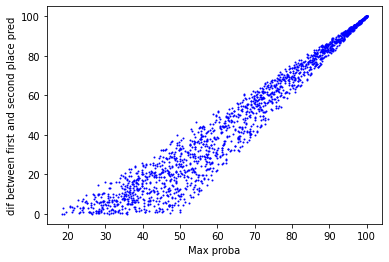

In [ ]:
plot_graph1(testy, pr,pr_out )

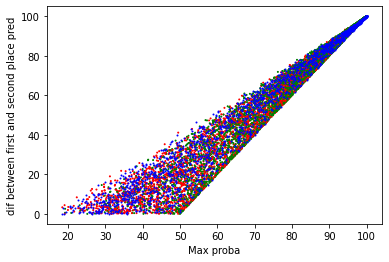

In [ ]:
plot_graph1(testy, pr,pr_out )